In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'feature_baseline_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []

metric = metrics.CountMetric(col='observationStartMJD')
slicer = slicers.HealpixSlicer()
sql = ''

bundleList.append(metricBundles.MetricBundle(metric,slicer,sql))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database SummaryAllProps with no constraint for columns ['fieldRA', 'fieldDec', 'observationStartMJD'].
Found 2304791 visits
Running:  ['opsim_Count_observationStartMJD_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


Plotting figures with "" constraint now.


/Users/yoachim/gitRepos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 1573 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 698.961  dipole: lon: 56.4897, lat: -75.3985, amp: 299.231
Plotting complete.


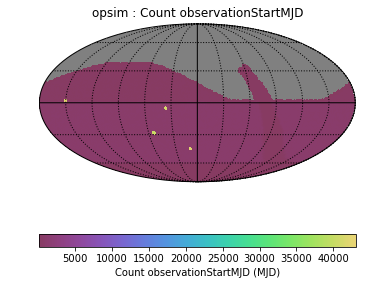

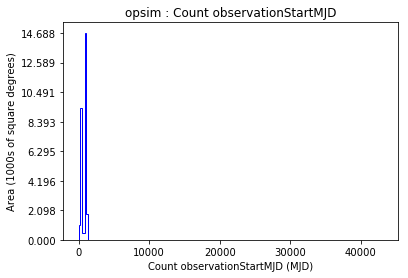

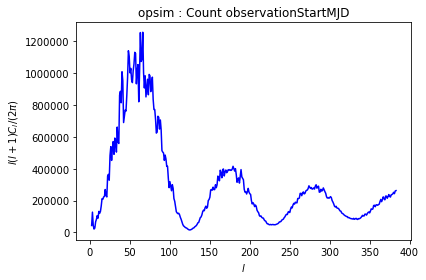

In [5]:
bg.plotAll(closefigs=False)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


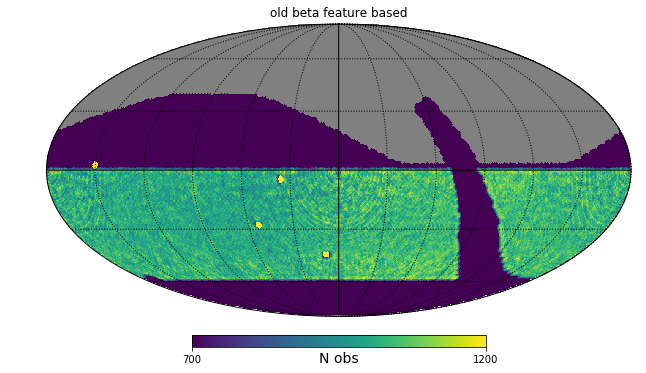

In [28]:
hp.mollview(bundleList[0].metricValues, min=700, max=1200, title='old beta feature based', unit='N obs')
hp.graticule()
plt.savefig('beta_fb_skymap.png')

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


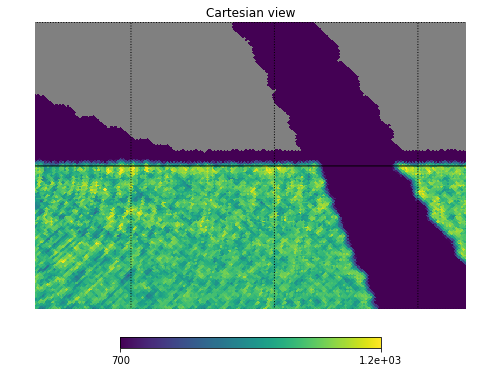

In [25]:
hp.cartview(bundleList[0].metricValues, min=700, max=1200, 
            lonra=[-100, -10], latra=[-30,30])
hp.graticule()

In [14]:
help(hp.cartview)

Help on function cartview in module healpy.visufunc:

cartview(map=None, fig=None, rot=None, zat=None, coord=None, unit='', xsize=800, ysize=None, lonra=None, latra=None, title='Cartesian view', nest=False, remove_dip=False, remove_mono=False, gal_cut=0, min=None, max=None, flip='astro', format='%.3g', cbar=True, cmap=None, norm=None, aspect=None, hold=False, sub=None, margins=None, notext=False, return_projected_map=False)
    Plot an healpix map (given as an array) in Cartesian projection.
    
    Parameters
    ----------
    map : float, array-like or None
      An array containing the map, 
      supports masked maps, see the `ma` function.
      If None, will display a blank map, useful for overplotting.
    fig : int or None, optional
      The figure number to use. Default: create a new figure
    rot : scalar or sequence, optional
      Describe the rotation to apply.
      In the form (lon, lat, psi) (unit: degrees) : the point at
      longitude *lon* and latitude *lat* wil